Carry out Visualization for the following questions:
1) Compare churn count with respect to gender. 
2) Find out how many female senior citizens there in the dataset 
3) Compare 'tenure' with 'Total Charges' 
4) Find out which contract preffered by the senior citizen. 5) Comment your finds on Payment Method?
dataset link : https://docs.google.com/spreadsheets/d/1dUFn10ZHSFopgEMoSZh9vSItbIrQVP7F/edit?usp=sharing&ouid=109909400691240810889&rtpof=true&sd=true

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("Telco-Customer-Churn.xlsx")

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The above data gives details of customers telecom .

In [8]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We do not have any missing values

In [22]:
#1) Compare churn count with respect to gender.

data1 = data["gender"]
data2 = data["Churn"]
data3 = data1+data2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


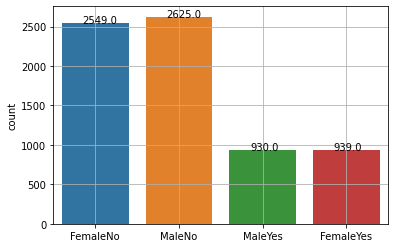

In [72]:

ax = sns.countplot(data3)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.grid()
plt.show()


Looking at the above graph churn rate for Female is slightly higher than Male 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


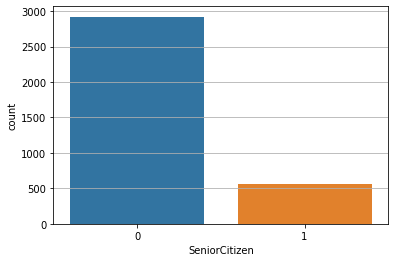

In [71]:
#2) Find out how many female senior citizens there in the dataset

female_filter = data[data["gender"] == "Female"]
plt.grid()

sns.countplot(female_filter["SeniorCitizen"])

In [70]:
female_filter["SeniorCitizen"].value_counts()

0    2920
1     568
Name: SeniorCitizen, dtype: int64

We can see there are 568 Senior citizens who are female 

In [90]:
#3) Compare 'tenure' with 'Total Charges'
data["TotalCharges"]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [91]:
data["tenure"]

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [94]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors = 'coerce')

Text(0, 0.5, 'Total Charges')

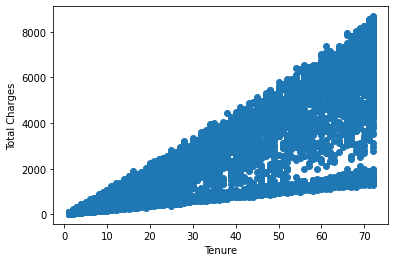

In [96]:
plt.scatter(data["tenure"] , data["TotalCharges"])
plt.xlabel("Tenure")
plt.ylabel("Total Charges")

Here we can see total charges increases with tenure .

In [98]:
#4) Find out which contract preffered by the senior citizen

data["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [100]:
data["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [102]:
data_senior = data[data["SeniorCitizen"] == 1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


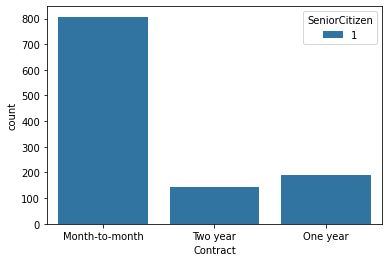

In [104]:
sns.countplot(data_senior["Contract"] ,hue = data_senior["SeniorCitizen"])

From the above graph its clear senior citizens prefer Month to month contracts

In [105]:
#5) Comment your finds on Payment Method?

data["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

Text(0, 0.5, 'Count')

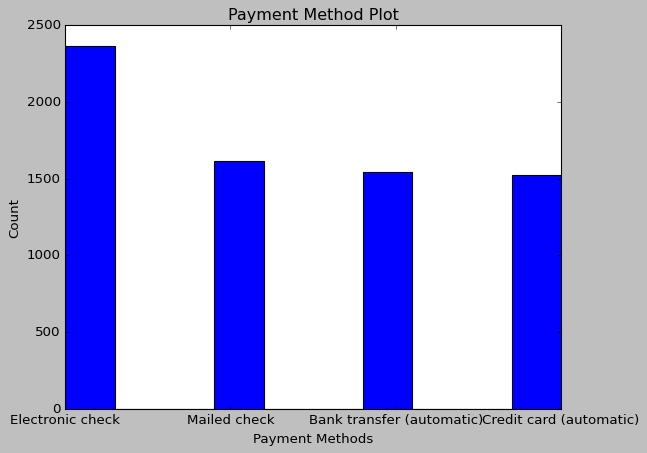

In [145]:
plt.style.use("classic")
plt.hist(data['PaymentMethod'])
plt.title('Payment Method Plot')
plt.xlabel('Payment Methods')
plt.ylabel('Count')

From the above we can understand that most people preferred Electronic check mode of payment

In [108]:
data_payment = data.groupby("PaymentMethod")

In [124]:
data_payment["gender"].value_counts()

PaymentMethod              gender
Bank transfer (automatic)  Female     788
                           Male       756
Credit card (automatic)    Male       770
                           Female     752
Electronic check           Male      1195
                           Female    1170
Mailed check               Male       834
                           Female     778
Name: gender, dtype: int64

Here we can see Bank transfer was mostly preferred by Females .
Credit card was mostly preferred by Males.


In [130]:
data_senior = data[data["SeniorCitizen"] == 1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


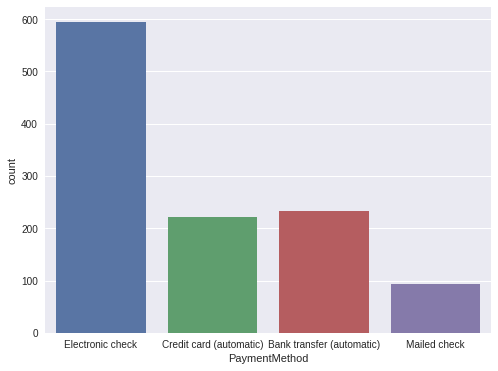

In [143]:
plt.style.use("seaborn")
plt.figure(figsize=(8,6))
sns.countplot(data_senior["PaymentMethod"])

Majority of the senior citizens prefessed Electronic check